<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-&amp;-Config" data-toc-modified-id="Imports-&amp;-Config-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports &amp; Config</a></span></li><li><span><a href="#Analyze-Dataset-Statistics" data-toc-modified-id="Analyze-Dataset-Statistics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analyze Dataset Statistics</a></span><ul class="toc-item"><li><span><a href="#Notable-tokens-and-their-statements" data-toc-modified-id="Notable-tokens-and-their-statements-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Notable tokens and their statements</a></span></li><li><span><a href="#Validation-Set" data-toc-modified-id="Validation-Set-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Validation Set</a></span></li><li><span><a href="#Test-Set" data-toc-modified-id="Test-Set-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Test Set</a></span></li><li><span><a href="#Train-Set" data-toc-modified-id="Train-Set-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Train Set</a></span></li></ul></li><li><span><a href="#TBD" data-toc-modified-id="TBD-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>TBD</a></span></li></ul></div>

# Analysis_Dataset_Stats <a class="tocSkip">

## Imports \& Config

In [1]:
# Set editor width to something sane
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from pathlib import Path
import sys
# get root repository path
a = !pwd
repo_root = a[0].rsplit('ProGraML', maxsplit=1,)[0] + 'ProGraML'
print(repo_root)
#insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, repo_root)
repo_root = Path(repo_root)


/home/zacharias/ProGraML


In [3]:
import pickle

import numpy as np
from matplotlib import pyplot as plt
import tqdm
import torch
from torch_geometric.data import Data, DataLoader

In [5]:
from deeplearning.ml4pl.models.ggnn.configs import GGNN_POJ104_Config as GGNNConfig
from deeplearning.ml4pl.models.ggnn.run import Learner
from deeplearning.ml4pl.models.ggnn.modeling import GGNNModel
from deeplearning.ml4pl.poj104.dataset import POJ104Dataset


/home/zacharias/ProGraML/deeplearning/ml4pl/models/ggnn/run.py
/home/zacharias/ProGraML


## Analyze Dataset Statistics

### Notable tokens and their statements

```
unreachable,232
ret void,263
!UNK,8564
!IDENTIFIER, 8565
magic/root/ I forgot, 8567
```

In [6]:
def simple_barchart(bins, title, ylog=False):
    plt.figure(figsize=(16, 4))
    plt.title(label=title)
    plt.bar(range(len(bins)), bins) # if not ylog else np.log1p(bins.numpy()))
    if ylog:
        plt.yscale('log')
    else:
        plt.yscale('linear')
    plt.grid(axis='y', which='major' )
    plt.show()

def print_dataset_stats(dataset):
    print(dataset)
    x = []
    y = []
    attr = []
    for i, data in enumerate(dataset):
        x.append(data.x.squeeze(dim=1))
        y.append(data.y.item())
        attr.append(data.edge_attr)
        
    x = torch.cat(x)
    
    y = torch.tensor(y)
    ybins = torch.bincount(y, minlength=104)
    
    attr = torch.cat(attr)
    edge_types = attr[:, 0]
    edge_type_bins = torch.bincount(edge_types)

    edge_pos = attr[:, 1]
    edge_pos_bins = torch.bincount(edge_pos)

    #print(x.size())
    bins = torch.bincount(x[:, 0], minlength=8568)

    #print('token, count, percentage of whole')
    s = torch.sum(bins)
    unique = 0
    for i, c in enumerate(bins):
        if c:
            unique += 1
            #print(f"{i}  {c.item()}   {(c*100/s.float()).item():.3f}")
    print(f"No of unique tokens {unique}/8568.")
    print(f"No of tokens in ds: {s:,}.")
    print(f"No of !UNK in data: {bins[8564].item():,} -- [{bins[8564].item()*100/s.item():.2f}%].")
    print(f"No of !ID in data: {bins[8565].item():,} -- [{bins[8565].item()*100/s.item():.2f}%].")

    simple_barchart(ybins, 'Class Counts')
    simple_barchart(edge_type_bins, 'Edge Type Counts')
    simple_barchart(edge_pos_bins, 'Edge Position Counts', ylog=True)    
    

    plt.figure(figsize=(32, 4))
    plt.plot(bins) #, ls='')
    plt.grid(which='both', axis='y')
    plt.yscale('log')
    plt.yticks()
    #plt.plot(bad_log, ls='dotted')
    plt.show()

### Validation Set

In [8]:
ds_dir = repo_root / 'deeplearning/ml4pl/poj104/classifyapp_data'
valid_data = POJ104Dataset(ds_dir, 'val')


In [9]:
len(valid_data)

9152

POJ104Dataset(9152)
No of unique tokens 313/8568.
No of tokens in ds: 2,652,846.
No of !UNK in data: 431,914 -- [16.28%].
No of !ID in data: 1,171,614 -- [44.16%].


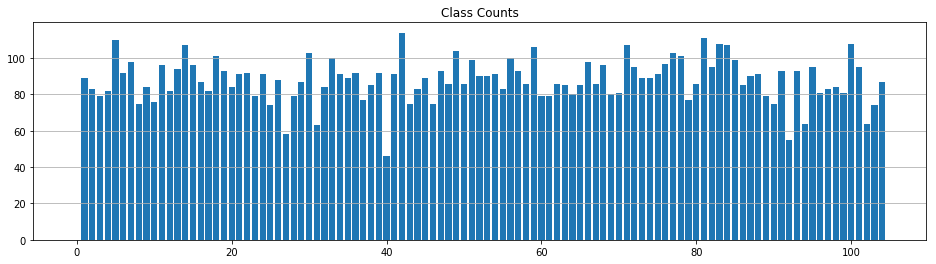

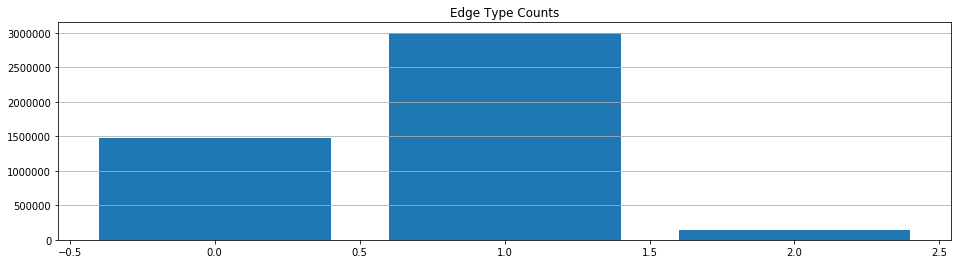

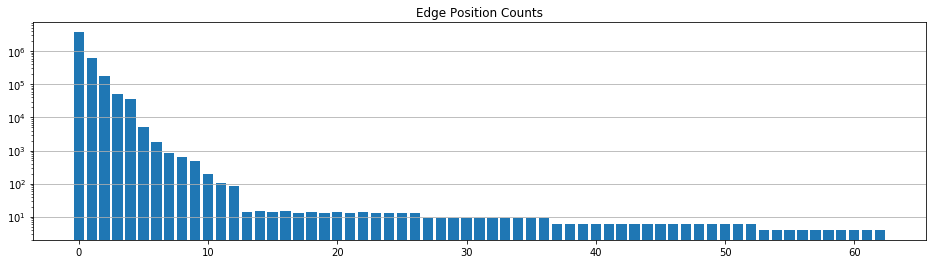

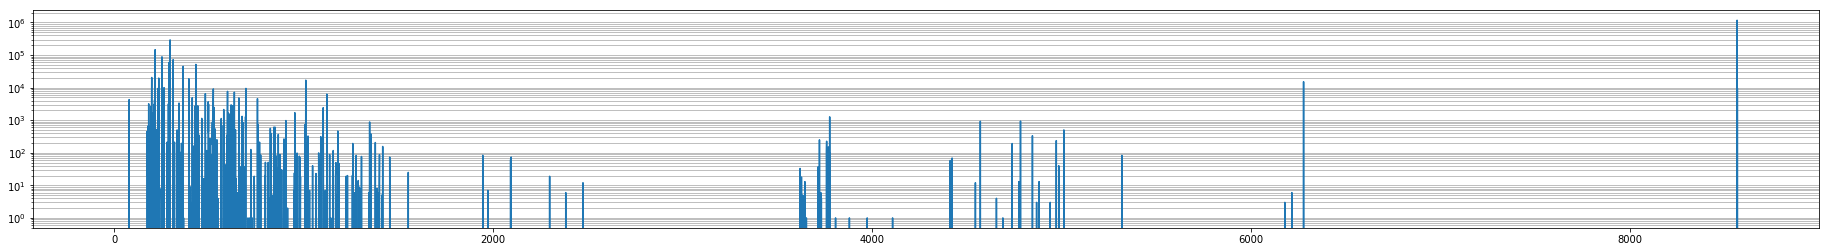

In [7]:
print_dataset_stats(valid_data)

### Test Set

In [8]:
test_data = POJ104Dataset(ds_dir, 'test')

POJ104Dataset(9223)
No of unique tokens 318/8568.
No of tokens in ds: 2,621,085.
No of !UNK in data: 426,325 -- [16.27%].
No of !ID in data: 1,157,042 -- [44.14%].


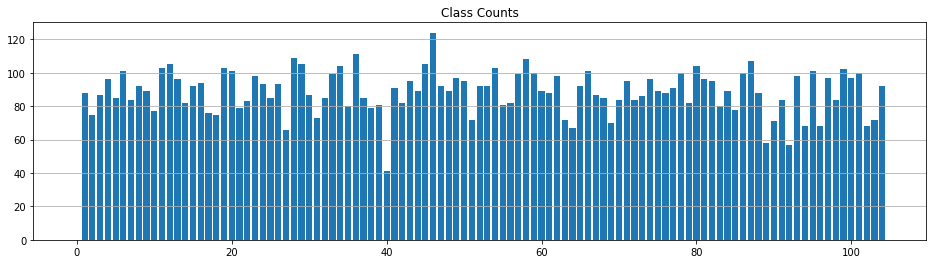

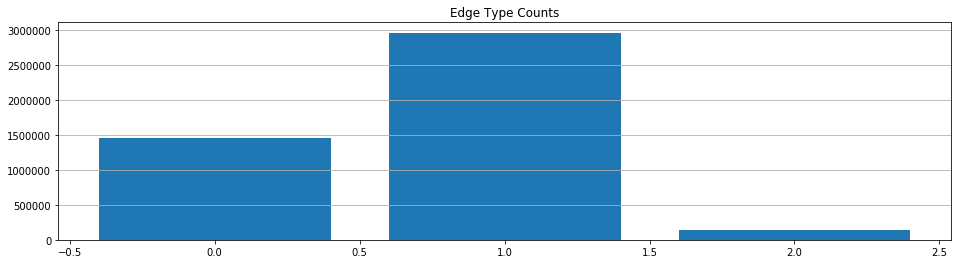

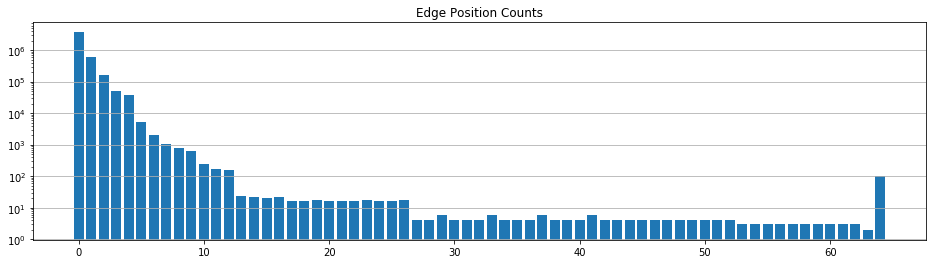

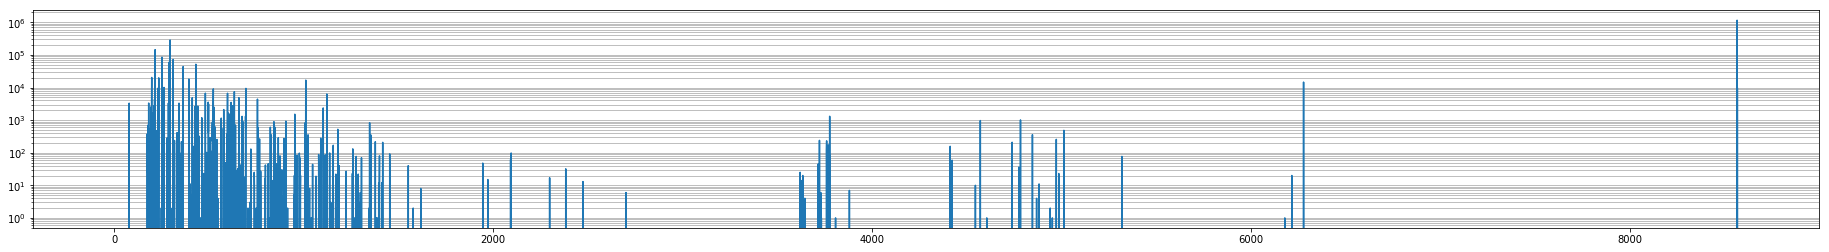

In [9]:
print_dataset_stats(test_data)

### Train Set

In [10]:
train_data = POJ104Dataset(ds_dir, 'train')

POJ104Dataset(221079)
No of unique tokens 779/8568.
No of tokens in ds: 70,118,083.
No of !UNK in data: 14,518,651 -- [20.71%].
No of !ID in data: 33,273,650 -- [47.45%].


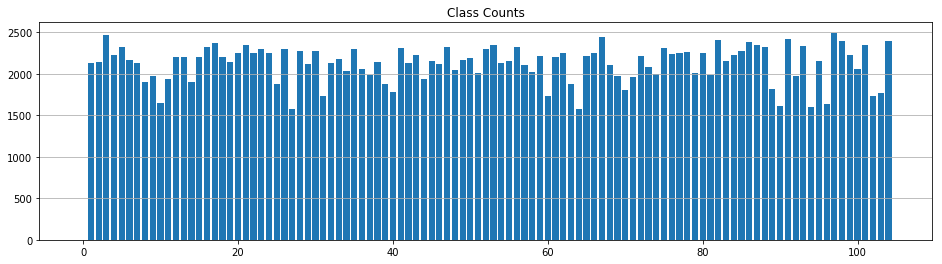

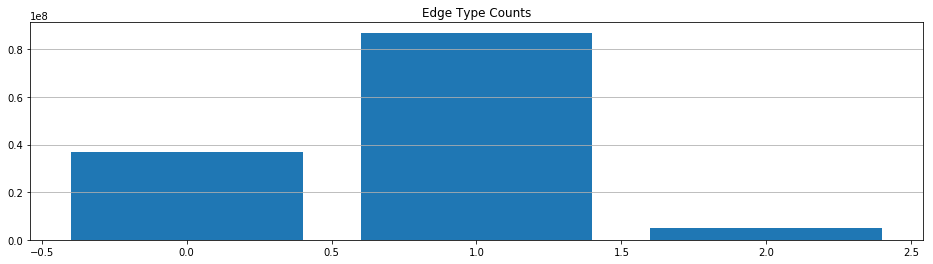

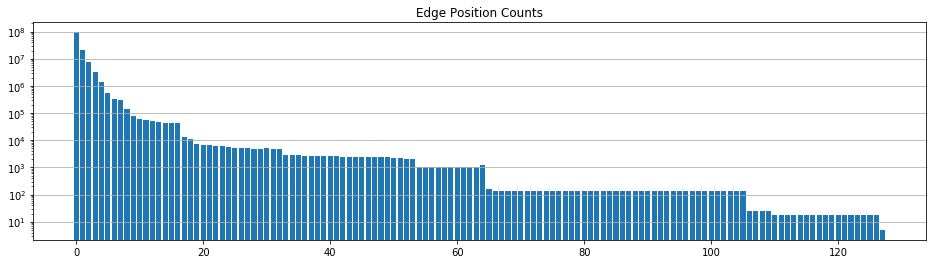

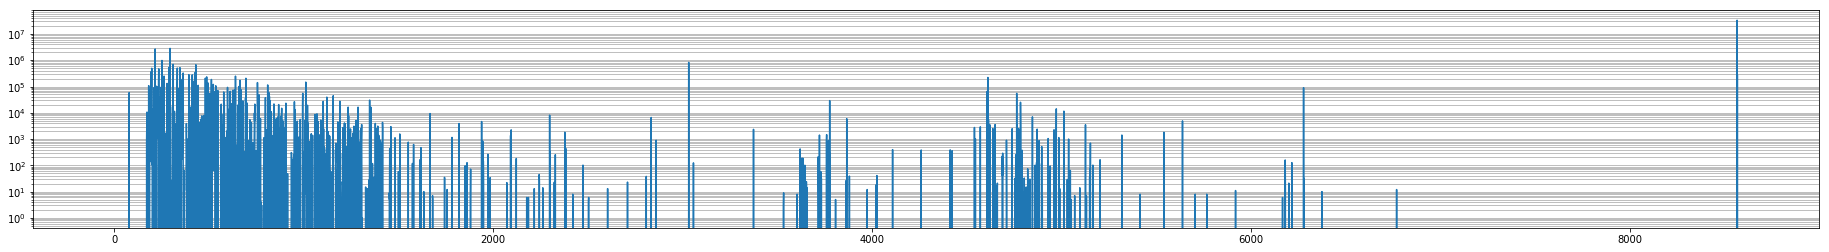

In [11]:
print_dataset_stats(train_data)

## TBD

In [ ]:
import networkx.algorithms.isomorphism as iso

from torch_geometric.utils import convert